In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

df = pd.concat([X, y], axis = 1)
df



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


<Axes: >

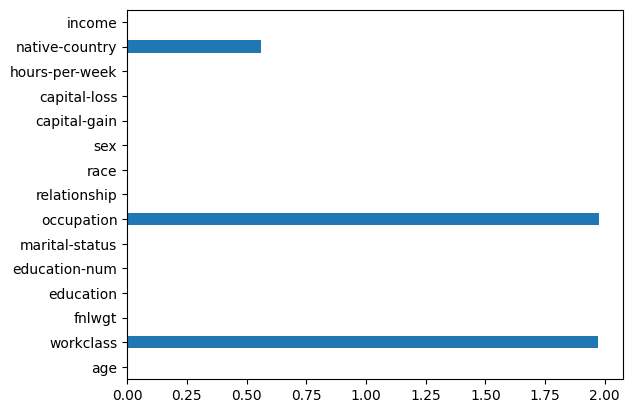

In [4]:
((df.isna().sum() /df.shape[0]) * 100).plot(kind = "barh")


In [5]:
null_values = [keys  for keys, values in df.isna().sum().items() if values !=0 ]
null_values

['workclass', 'occupation', 'native-country']

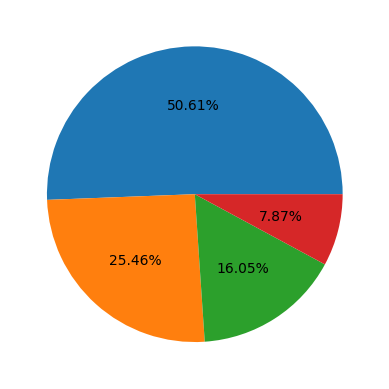

In [6]:
plt.pie(df["income"].value_counts(), autopct = "%1.2f%%");

In [7]:
df.loc[df["income"] == "<=50K.", "income"] = "<=50K"
df.loc[df["income"] == ">50K.", "income"] = ">50K"

<Axes: xlabel='income', ylabel='education-num'>

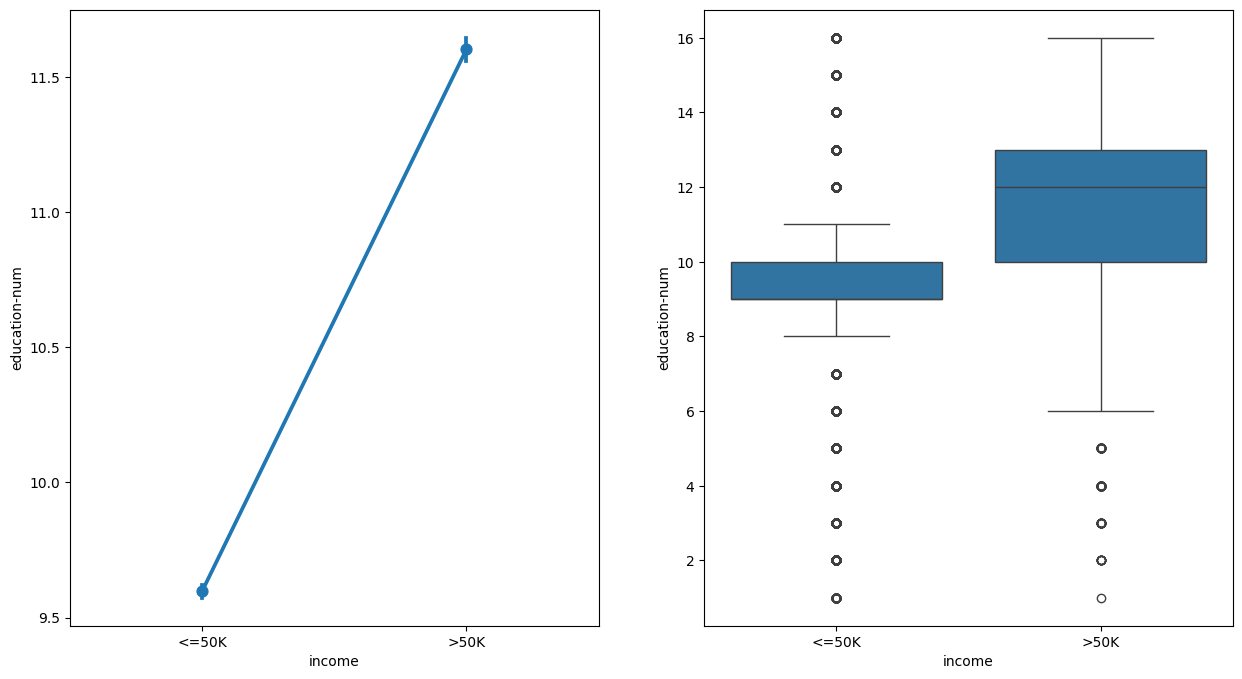

In [8]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.pointplot(df, x = "income", y = "education-num", ax = axes[0])

sns.boxplot(df, x = "income", y = "education-num", ax = axes[1])

<Axes: xlabel='income', ylabel='age'>

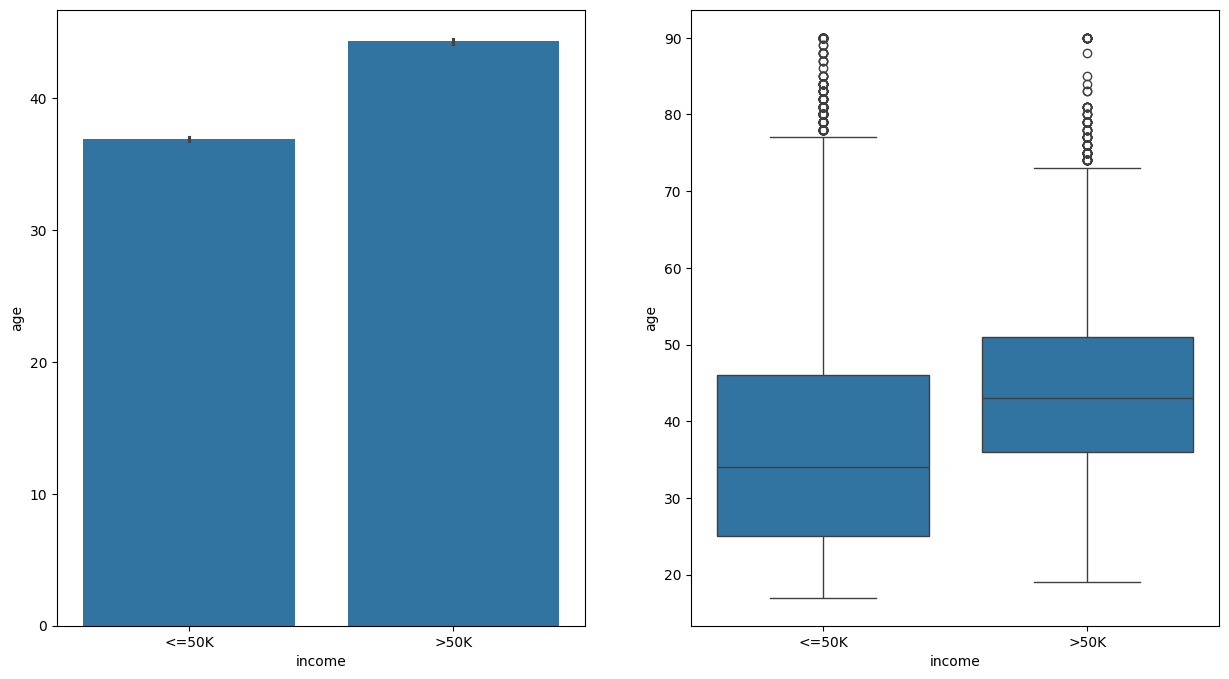

In [9]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.barplot(df, x = "income", y = "age", ax = axes[0])

sns.boxplot(df, x = "income", y = "age", ax = axes[1])

<Axes: xlabel='income', ylabel='fnlwgt'>

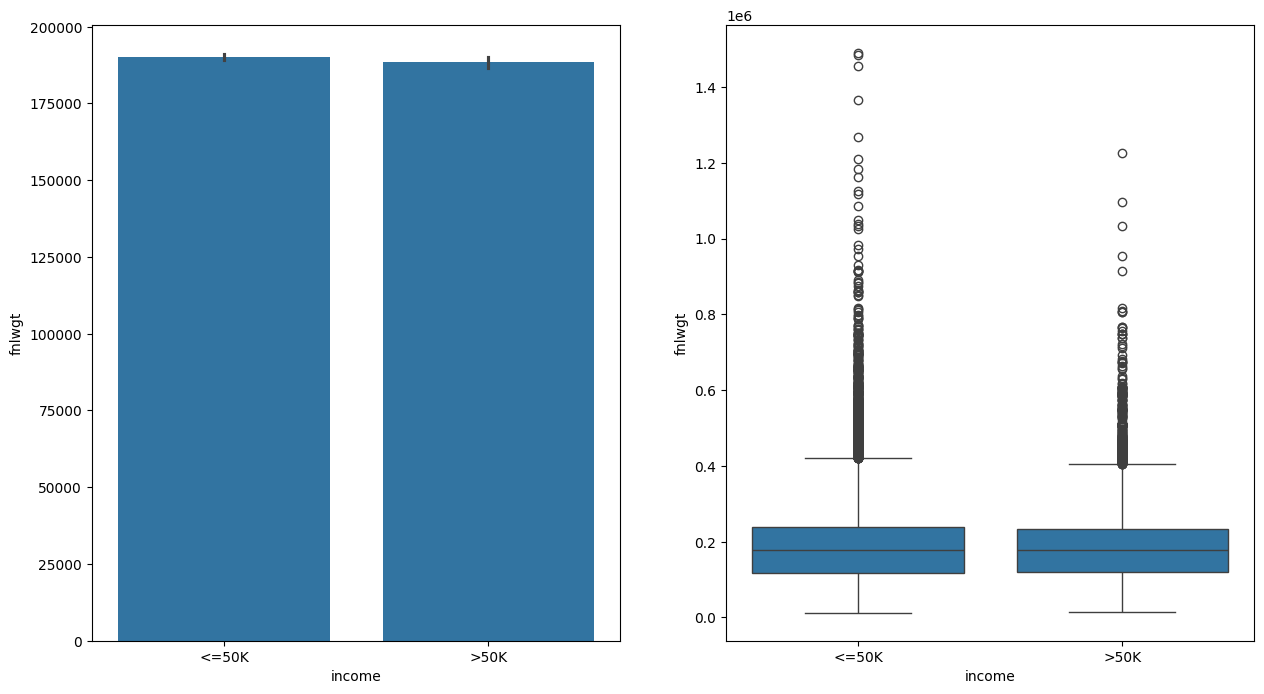

In [10]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.barplot(df, x = "income", y = "fnlwgt", ax = axes[0])

sns.boxplot(df, x = "income", y = "fnlwgt", ax = axes[1])

<Axes: xlabel='income', ylabel='capital-loss'>

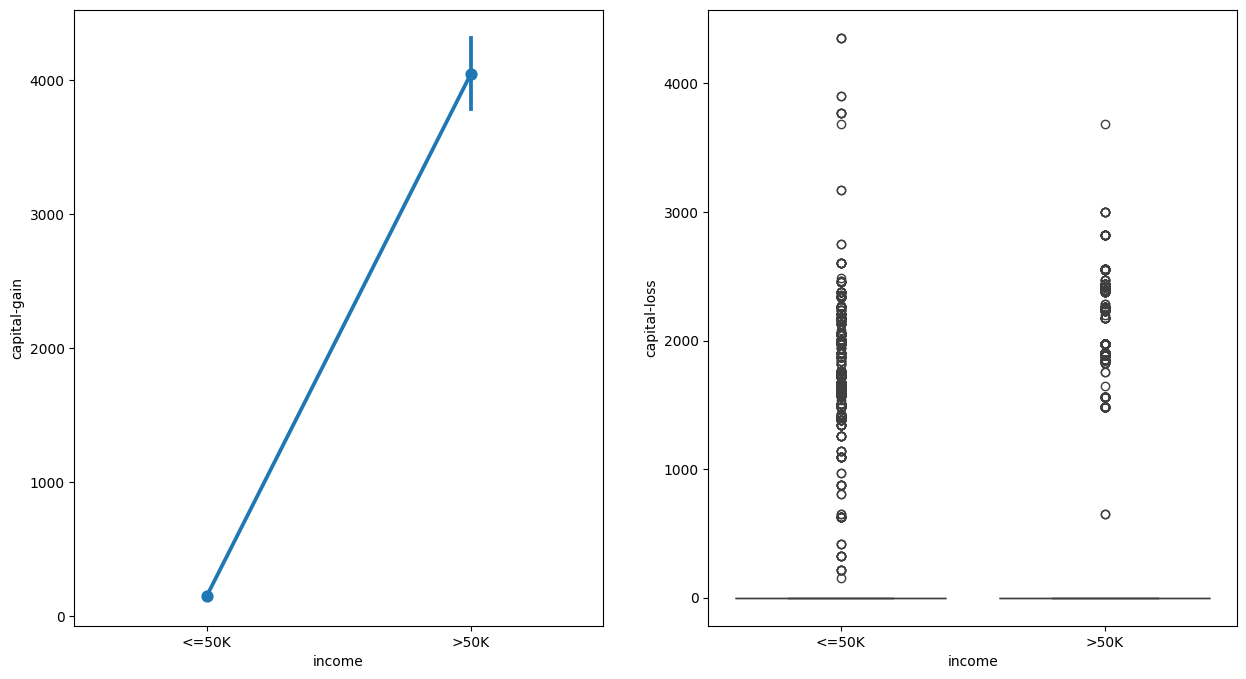

In [11]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.pointplot(df, x = "income", y = "capital-gain", ax = axes[0])

sns.boxplot(df, x = "income", y = "capital-loss", ax = axes[1])

<Axes: xlabel='income', ylabel='hours-per-week'>

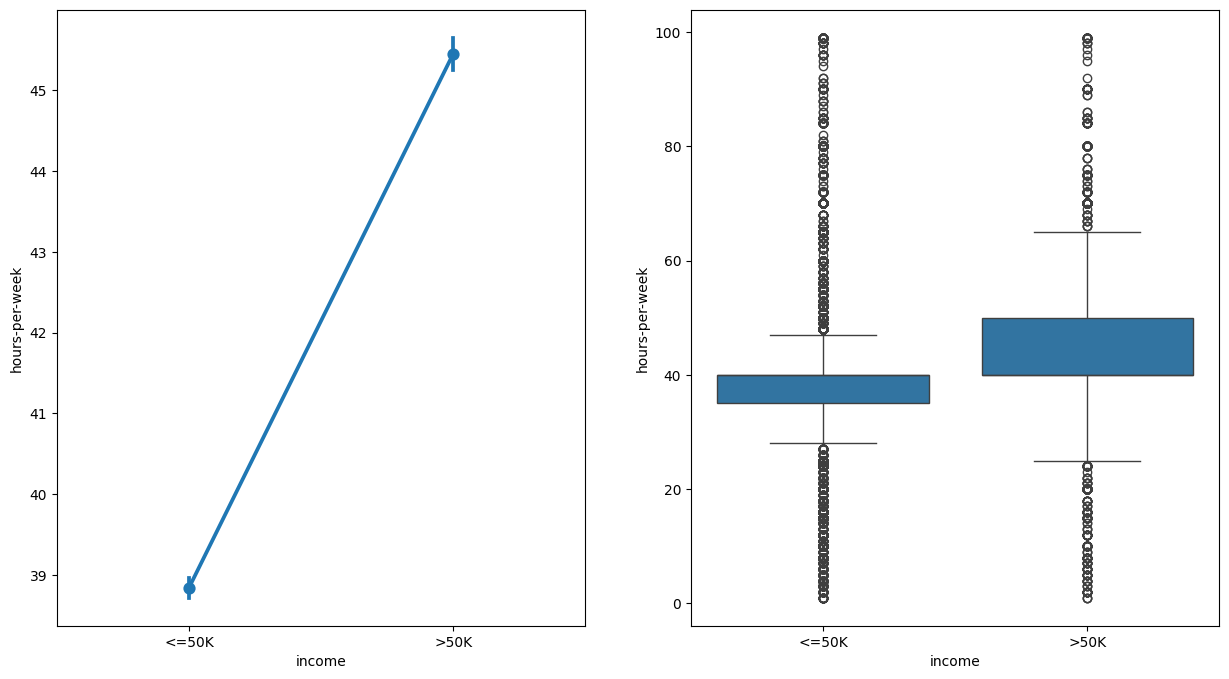

In [12]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.pointplot(df, x = "income", y = "hours-per-week", ax = axes[0])

sns.boxplot(df, x = "income", y = "hours-per-week", ax = axes[1])

In [13]:
df_tmp = df.copy()
for i in df_tmp.columns:
  if pd.api.types.is_object_dtype(df[i]):
    df_tmp[i] = df_tmp[i].astype("category").cat.codes
for i in null_values:
  df_tmp[i] = df_tmp[i] + 1

<Axes: >

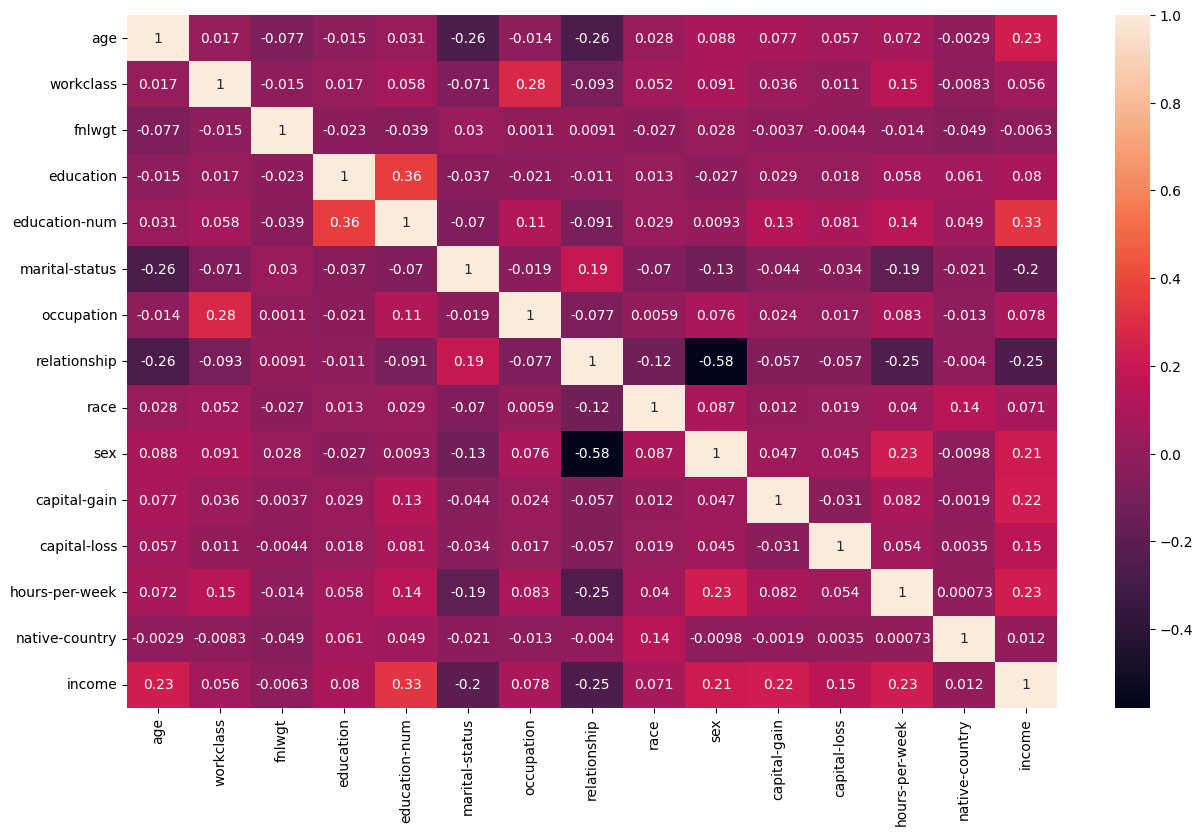

In [14]:
plt.figure(figsize = (15, 9))
sns.heatmap(df_tmp.corr(), annot = True)

In [15]:
categorical = []
non_categorical = []
for i in df.select_dtypes(include = "object").columns[:-1]:
  if df[i].nunique() > 2:
    categorical.append(i)
  else:
    non_categorical.append(i)


In [16]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [17]:
imputer = SimpleImputer(strategy = "most_frequent")
scale = StandardScaler()
one_hot = OneHotEncoder(sparse_output = False)
ordinal = OrdinalEncoder()

pipe2 = Pipeline([("scale", scale)])
pipe3 = Pipeline([("imputer", imputer),("one_hot", one_hot)])
pipe4 = Pipeline([("ordinal", ordinal)])


preprocessor = ColumnTransformer([
    ("one_hot", pipe3, categorical),
    ("ordinal", pipe4, non_categorical),
    ("scale", pipe2, [i for i in df.select_dtypes(include = [int, "float"]).columns])
], remainder = "passthrough" )


xgb = XGBClassifier()
random_forest = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
}


rf_tuned = GridSearchCV(random_forest, param_grid= rf_param_grid, cv = 5, n_jobs = -1)

xgb_tuned = GridSearchCV(xgb, param_grid= xgb_param_grid, cv = 5, n_jobs = -1)
voting = VotingClassifier(estimators=[("xgb", xgb_tuned), ("forestClass", rf_tuned)], voting = "hard")


final_pipe = Pipeline([("preprocecssor", preprocessor), ("model", voting)])

In [18]:
X = df.drop("income", axis = 1)
y = df.income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20)


In [ ]:
final_pipe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
final_pipe.score(X_test, y_test)